calc resistance: 1989.6754 ohm
Slope: 0.5026 ± 0.0007
Intercept: 0.183 ± 0.003


/var/folders/f9/38nkw6517lgf362dv55hy0xc0000gn/T/ipykernel_38669/1293395733.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, 'o', label='Experimental Data', markersize=3, marker='o', color='blue')


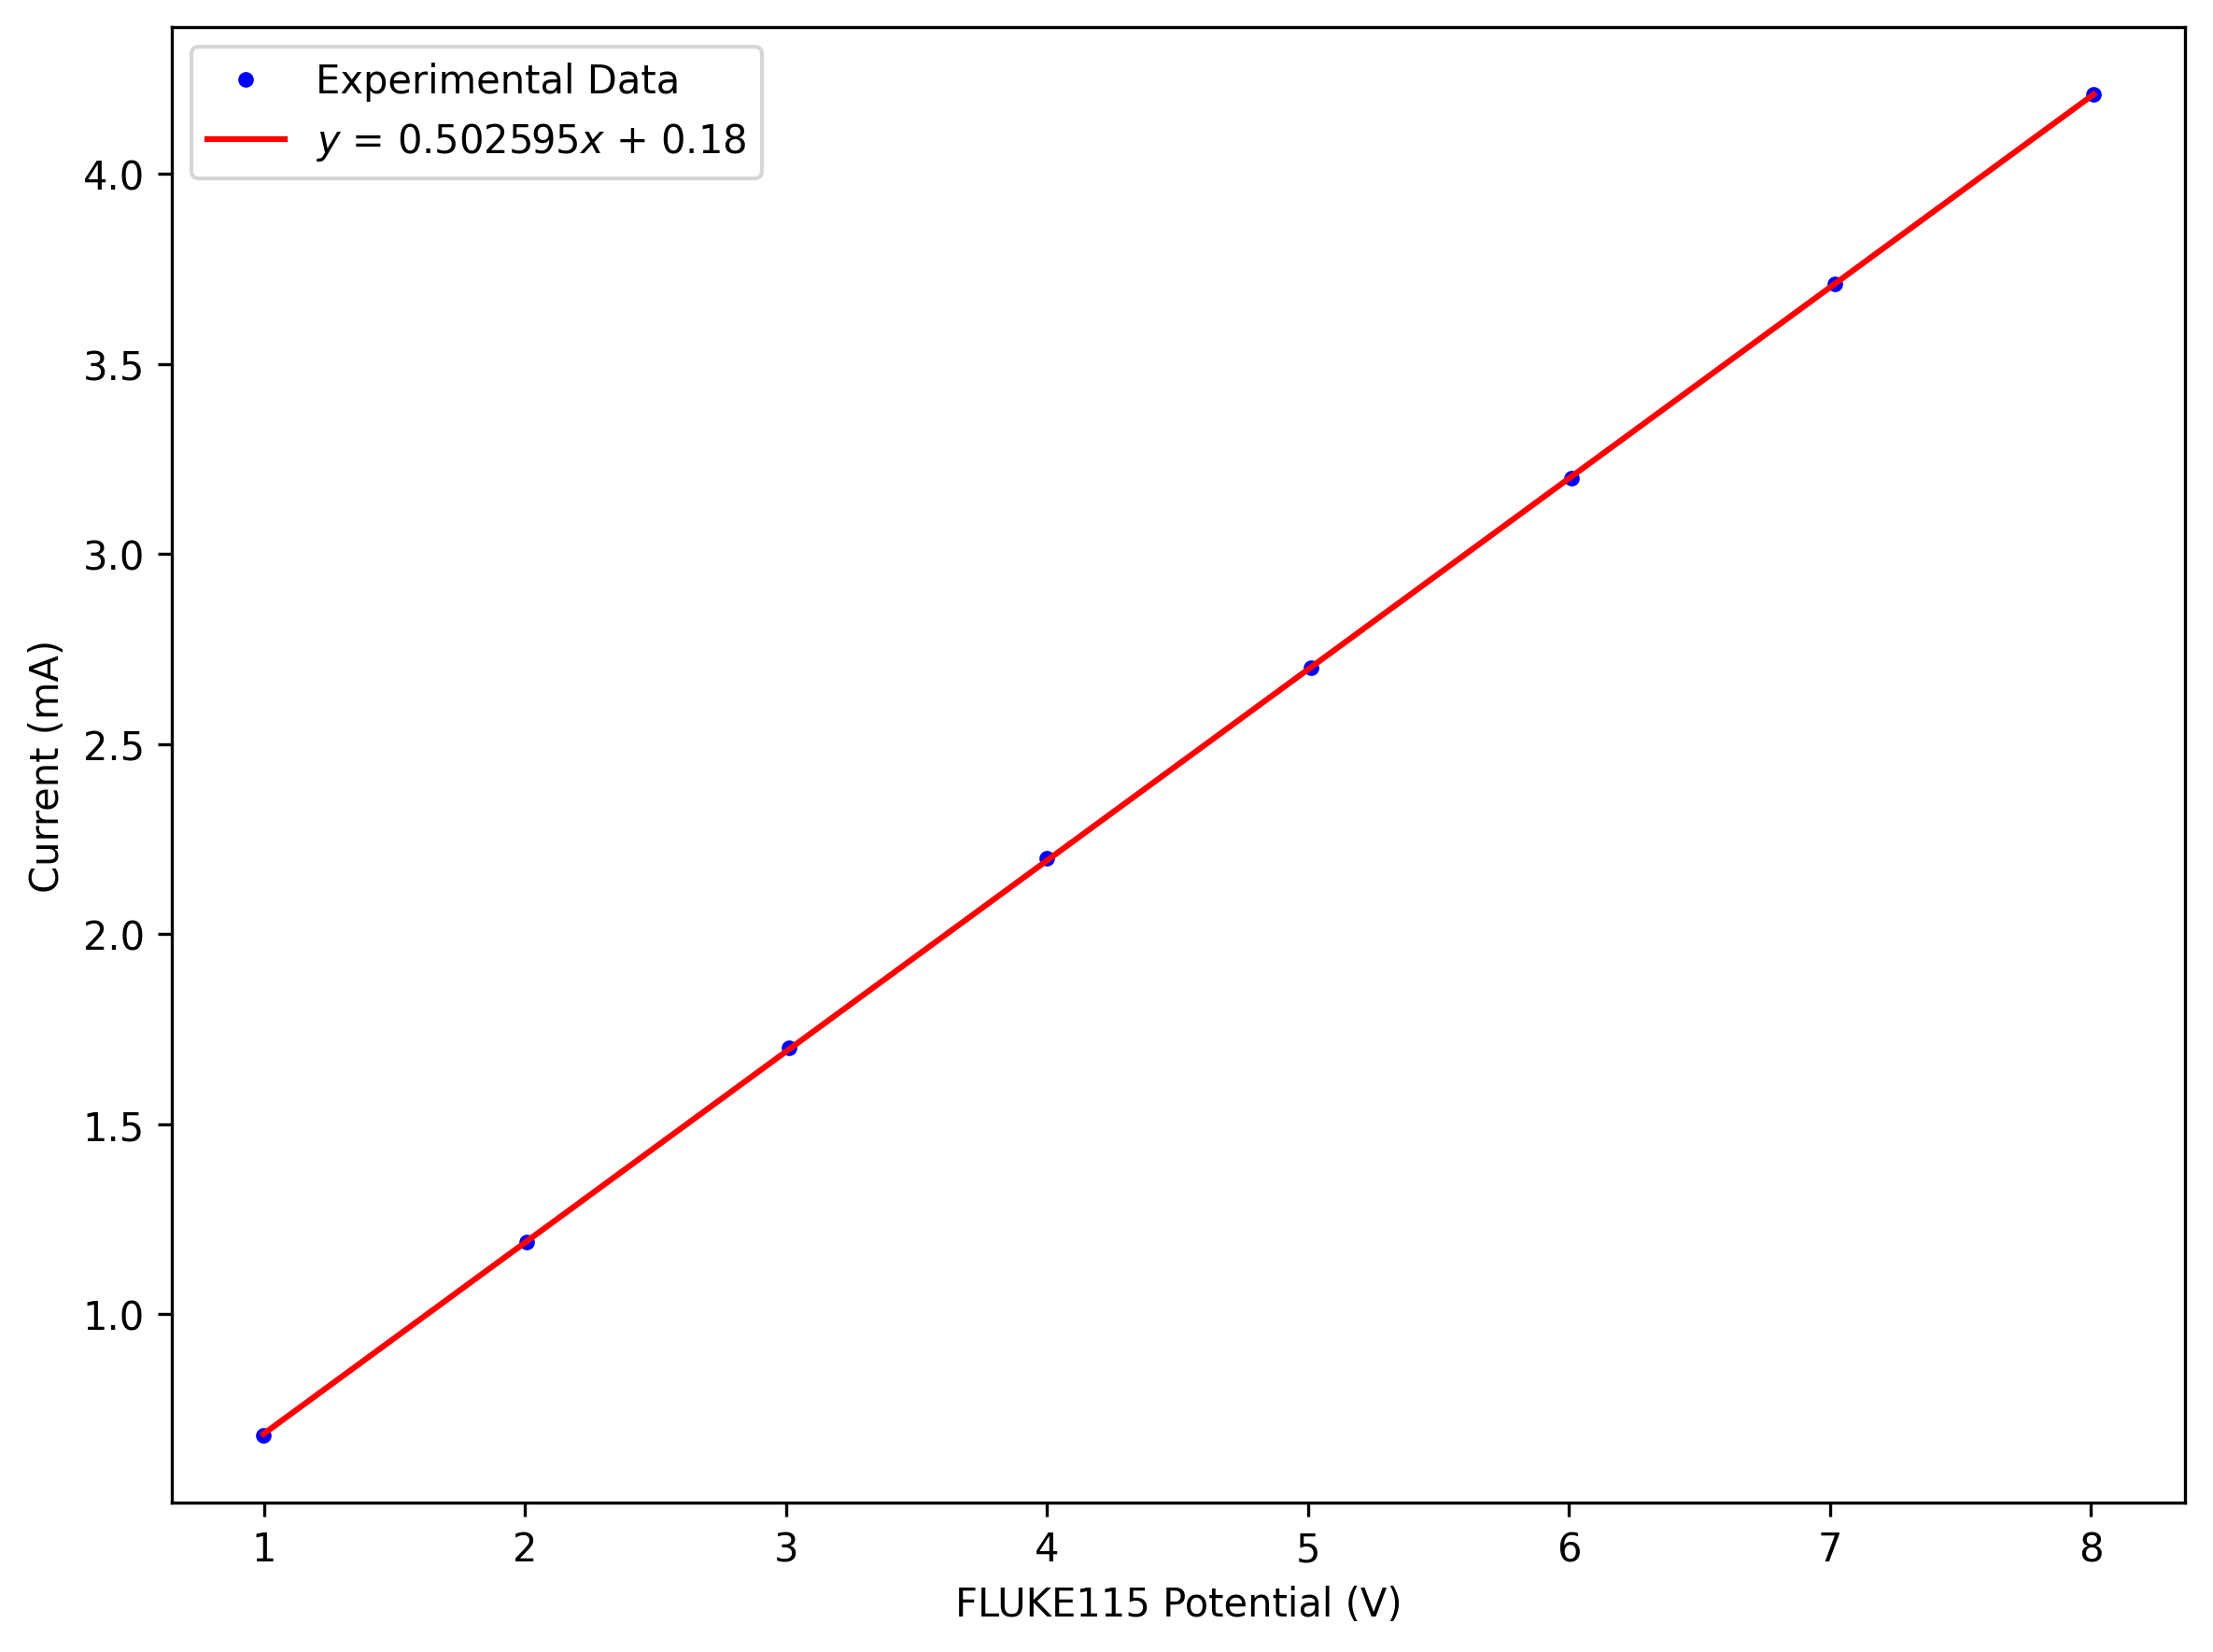

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([0.997, 2.004, 3.010, 3.998, 5.010, 6.010, 7.020, 8.010])
y = np.array([0.68, 1.19, 1.70, 2.20, 2.70, 3.20, 3.71, 4.21])

p, V = np.polyfit(x, y, 1, cov=True)
m,b = p

y2 = y / 1000
x2 = x
m2, b2 = np.polyfit(x2, y2, 1)
calc_resistance = 1 / m2
print(f'calc resistance: {calc_resistance:.4f} ohm')



slope_error = np.sqrt(V[0][0])
intercept_error = np.sqrt(V[1][1])

print(f'Slope: {m:.4f} ± {slope_error:.4f}')
print(f'Intercept: {b:.3f} ± {intercept_error:.3f}')

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

plt.plot(x, y, 'o', label='Experimental Data', markersize=3, marker='o', color='blue') 
plt.plot(x, m*x + b,  color='red', label=f'$y$ = {m:2f}$x$ + {b:.2f}')
plt.xlabel('FLUKE115 Potential (V)')
plt.ylabel('Current (mA)')
plt.tight_layout()
plt.legend()

Slope: 2.190e+05 ± 1.4e+03
Intercept: 4.43e+05 ± 6.0e+04


/var/folders/f9/38nkw6517lgf362dv55hy0xc0000gn/T/ipykernel_28078/608714985.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y, 'o', label='Experimental Data', markersize=3, marker='o', color='blue')


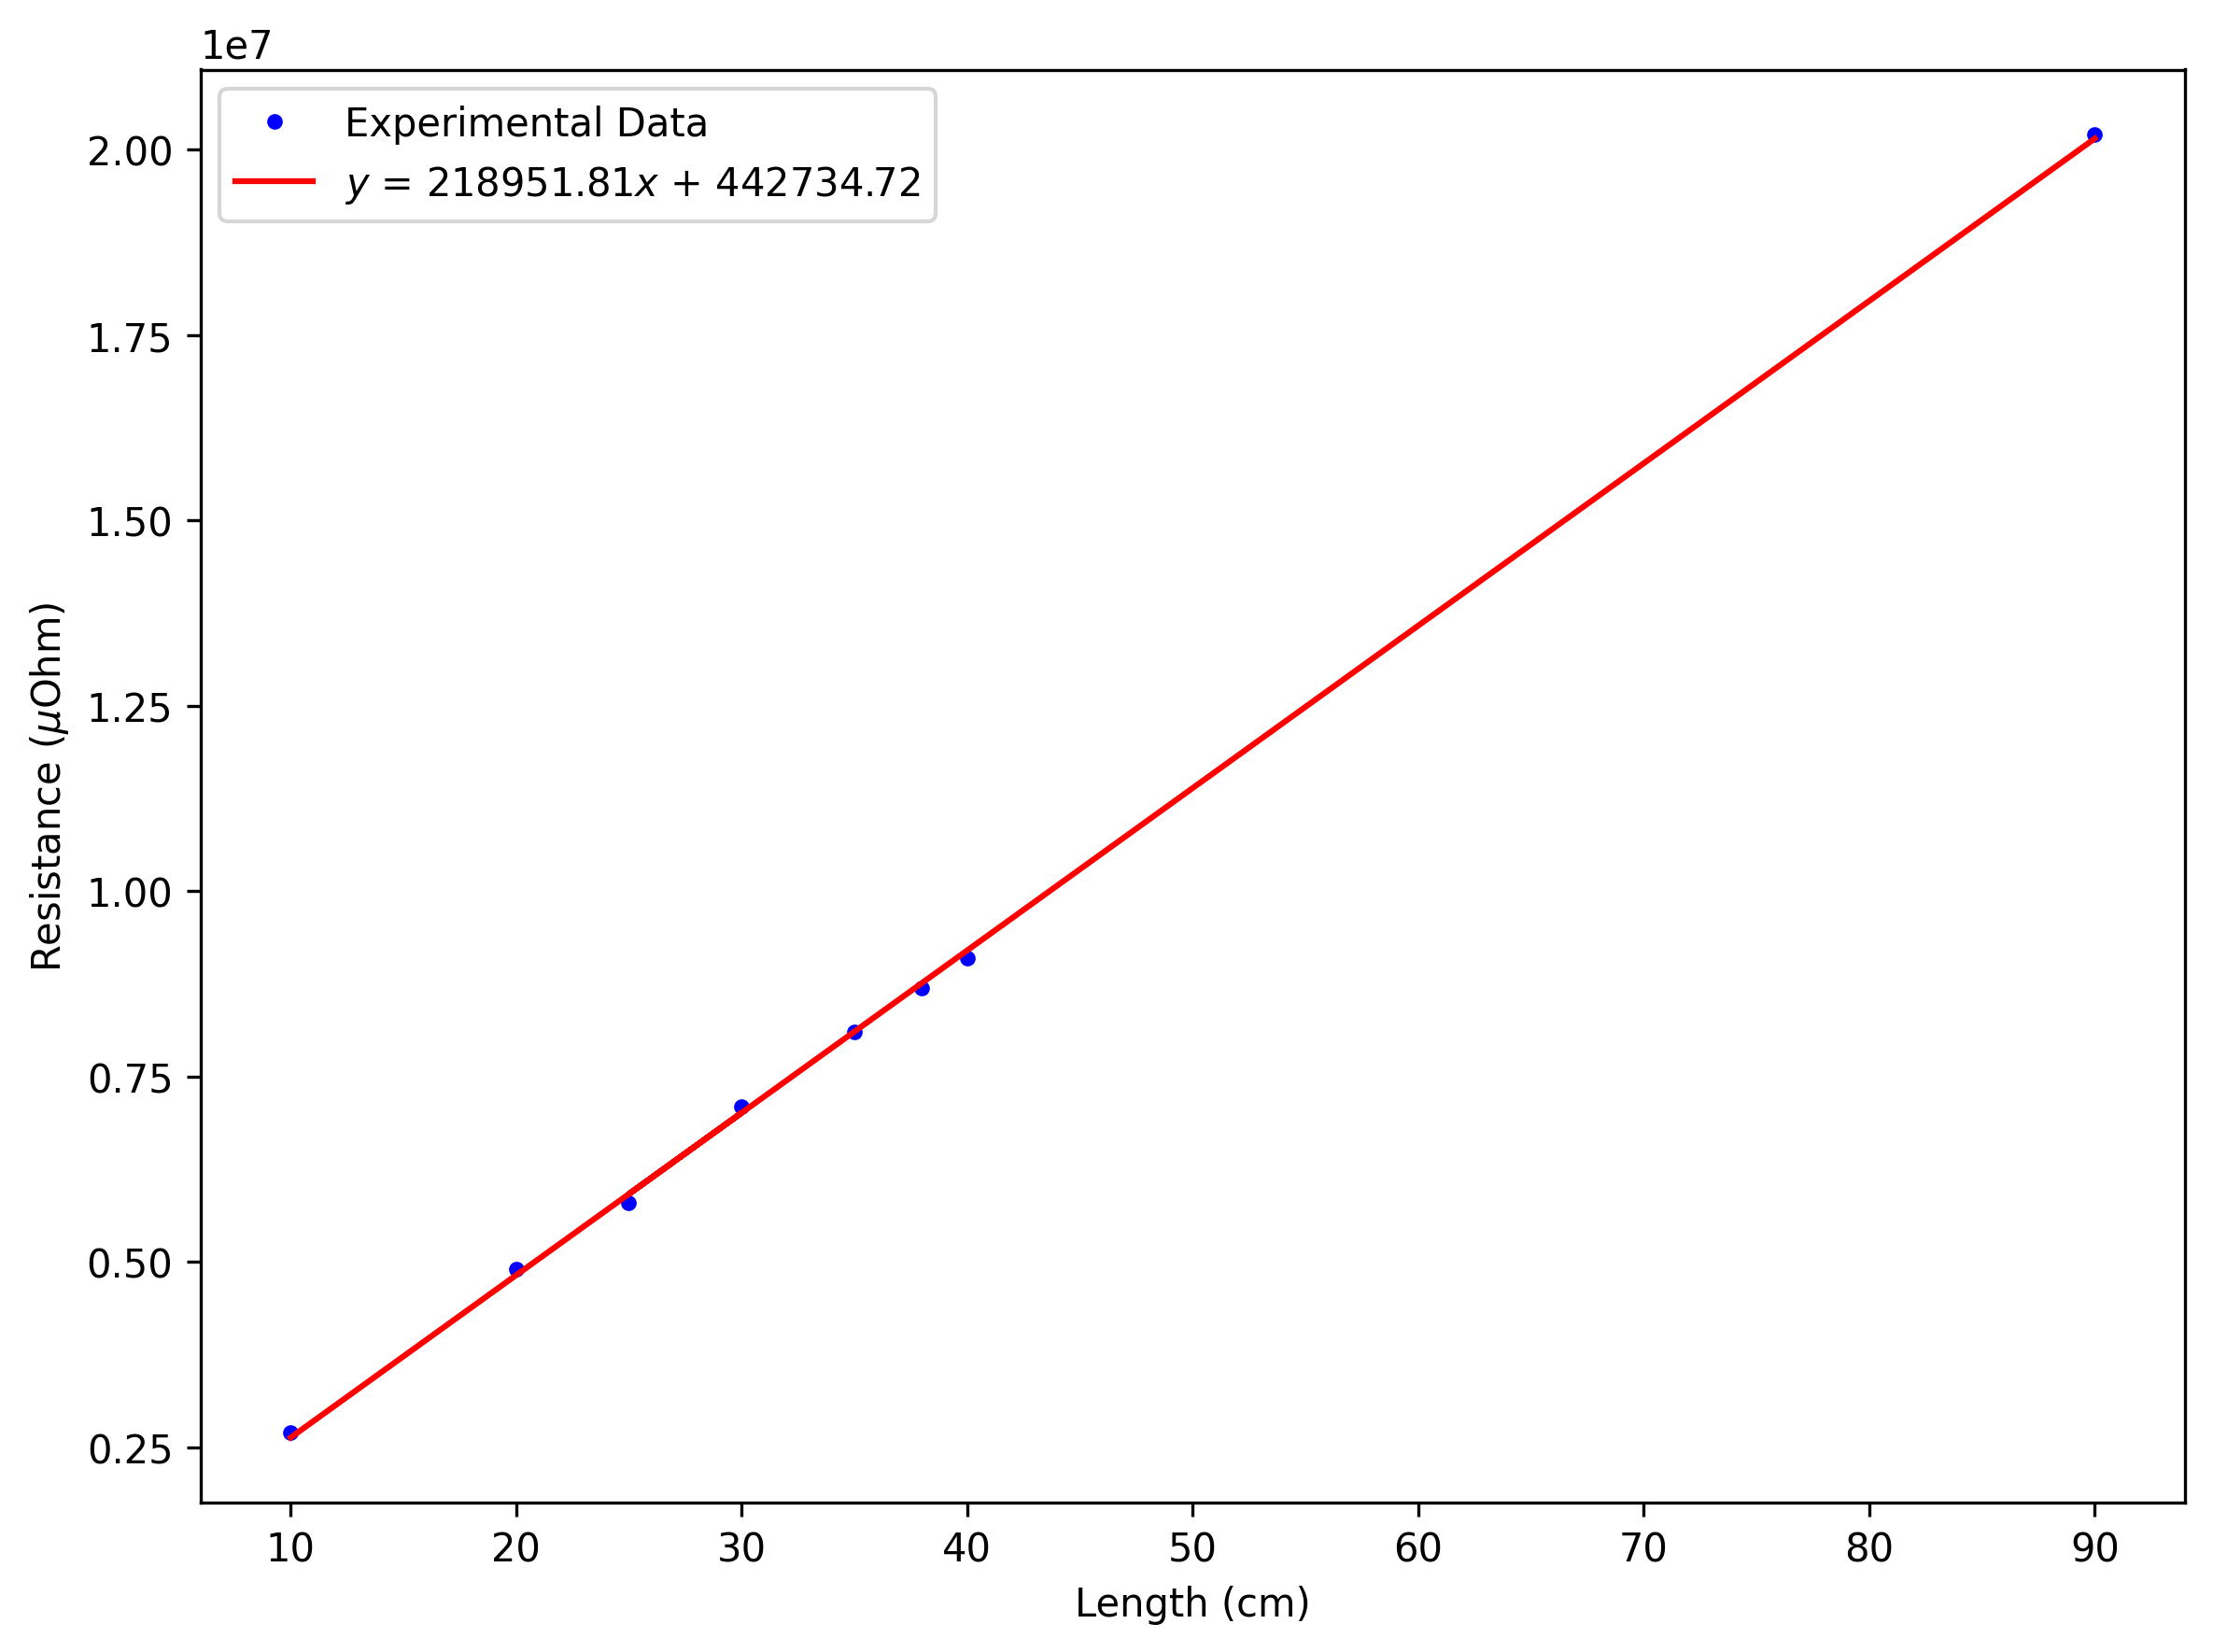

In [46]:
lengths = np.array([10, 20, 30, 25, 35, 38, 40, 90])
resistances = np.array([2.7, 4.9, 7.1, 5.8, 8.1, 8.7, 9.1, 20.2])

x = lengths
y = resistances * 1e6

p, V = np.polyfit(x, y, 1, cov=True)
m,b = p
slope_error = np.sqrt(V[0][0])
intercept_error = np.sqrt(V[1][1])

print(f'Slope: {m:.3e} ± {slope_error:.1e}')
print(f'Intercept: {b:.2e} ± {intercept_error:.1e}')

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

plt.plot(x, y, 'o', label='Experimental Data', markersize=3, marker='o', color='blue')
plt.plot(x, m*x + b,  color='red', label=f'$y$ = {m:.2f}$x$ + {b:.2f}')
plt.xlabel('Length (cm)')
plt.ylabel('Resistance ($\mu$Ohm)')
plt.legend()
plt.tight_layout()

calculating error for the diameter

propogation for powers
for  $\large y = x ^ n$

$$
    \frac{\delta y}{y} = \left| n \frac{\delta x}{x} \right|
$$

In [55]:
area = (112/m)
e_area = area * (slope_error/m)
print(f'Area: {area:.3e} ± {e_area:.2e} cm^2')

sqrt_area = np.sqrt(area)
e_sqrt_area = sqrt_area * ((0.5) * (e_area/area))


sqrt_area_over_pi = sqrt_area / (np.sqrt(np.pi))
e_sqrt_area_over_pi = e_sqrt_area / (np.sqrt(np.pi))

D = 2 * sqrt_area_over_pi
e_D = 2 * e_sqrt_area_over_pi

print(f'Diameter: {D:.6f} ± {e_D:.6f} cm')

Area: 5.115e-04 ± 3.33e-06 cm^2
Diameter: 0.025521 ± 0.000083 cm


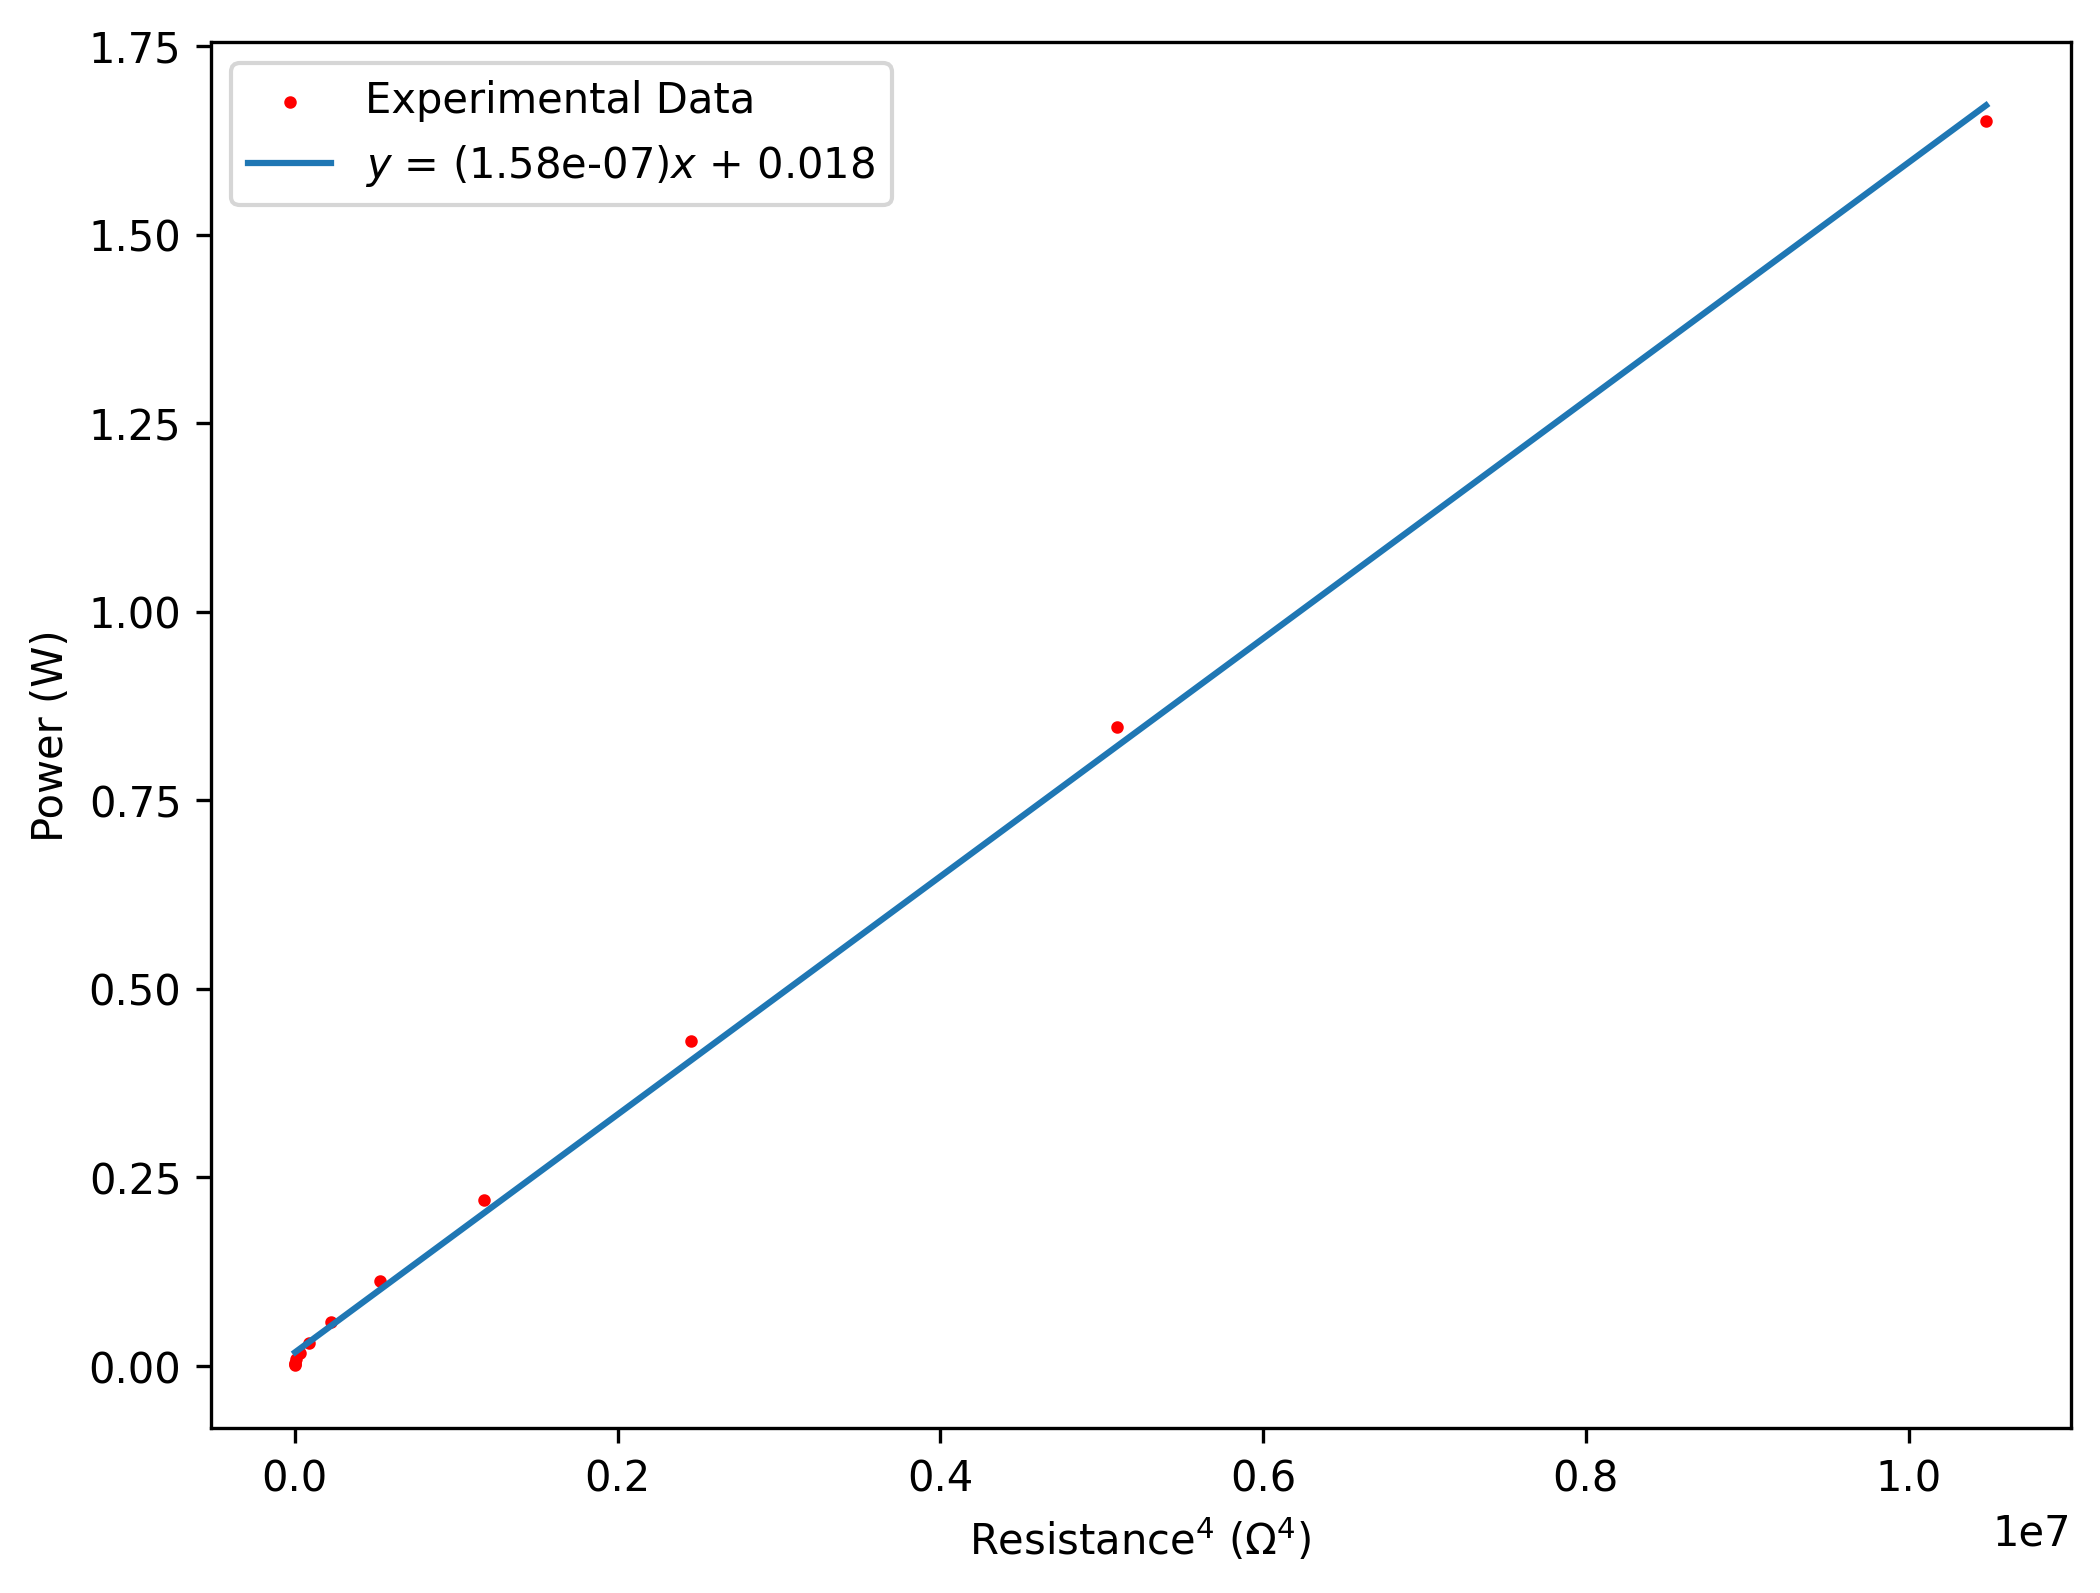

In [35]:
voltages = np.array([0.1 * 1.52**i for i in range(12)])
voltages = np.round(voltages, 2)

measured_voltages = np.array([0.080, 0.120, 0.188, 0.299, 0.468, 0.728, 1.128, 1.745, 2.694, 4.130, 6.342, 9.69])
currents = np.array([0.01185, 0.01760, 0.02413, 0.03040, 0.03580, 0.04245, 0.05188, 0.06471, 0.08187, 0.10435, 0.13350, 0.17031])

power = measured_voltages * currents
resistance = measured_voltages / currents

x = resistance ** 4
y = power

p, V = np.polyfit(x,y,1, cov=True)
m,b = p

slope_error = np.sqrt(V[0][0])
intercept_error = np.sqrt(V[1][1])

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

plt.scatter(x, y, marker='o', color='red', s=4, label='Experimental Data')
plt.plot(x, m*x + b, label=f'$y$ = ({m:.2e})$x$ + {b:.3f}')

plt.xlabel('Resistance$^4$ ($\Omega^4$)')
plt.ylabel('Power (W)')
plt.legend()

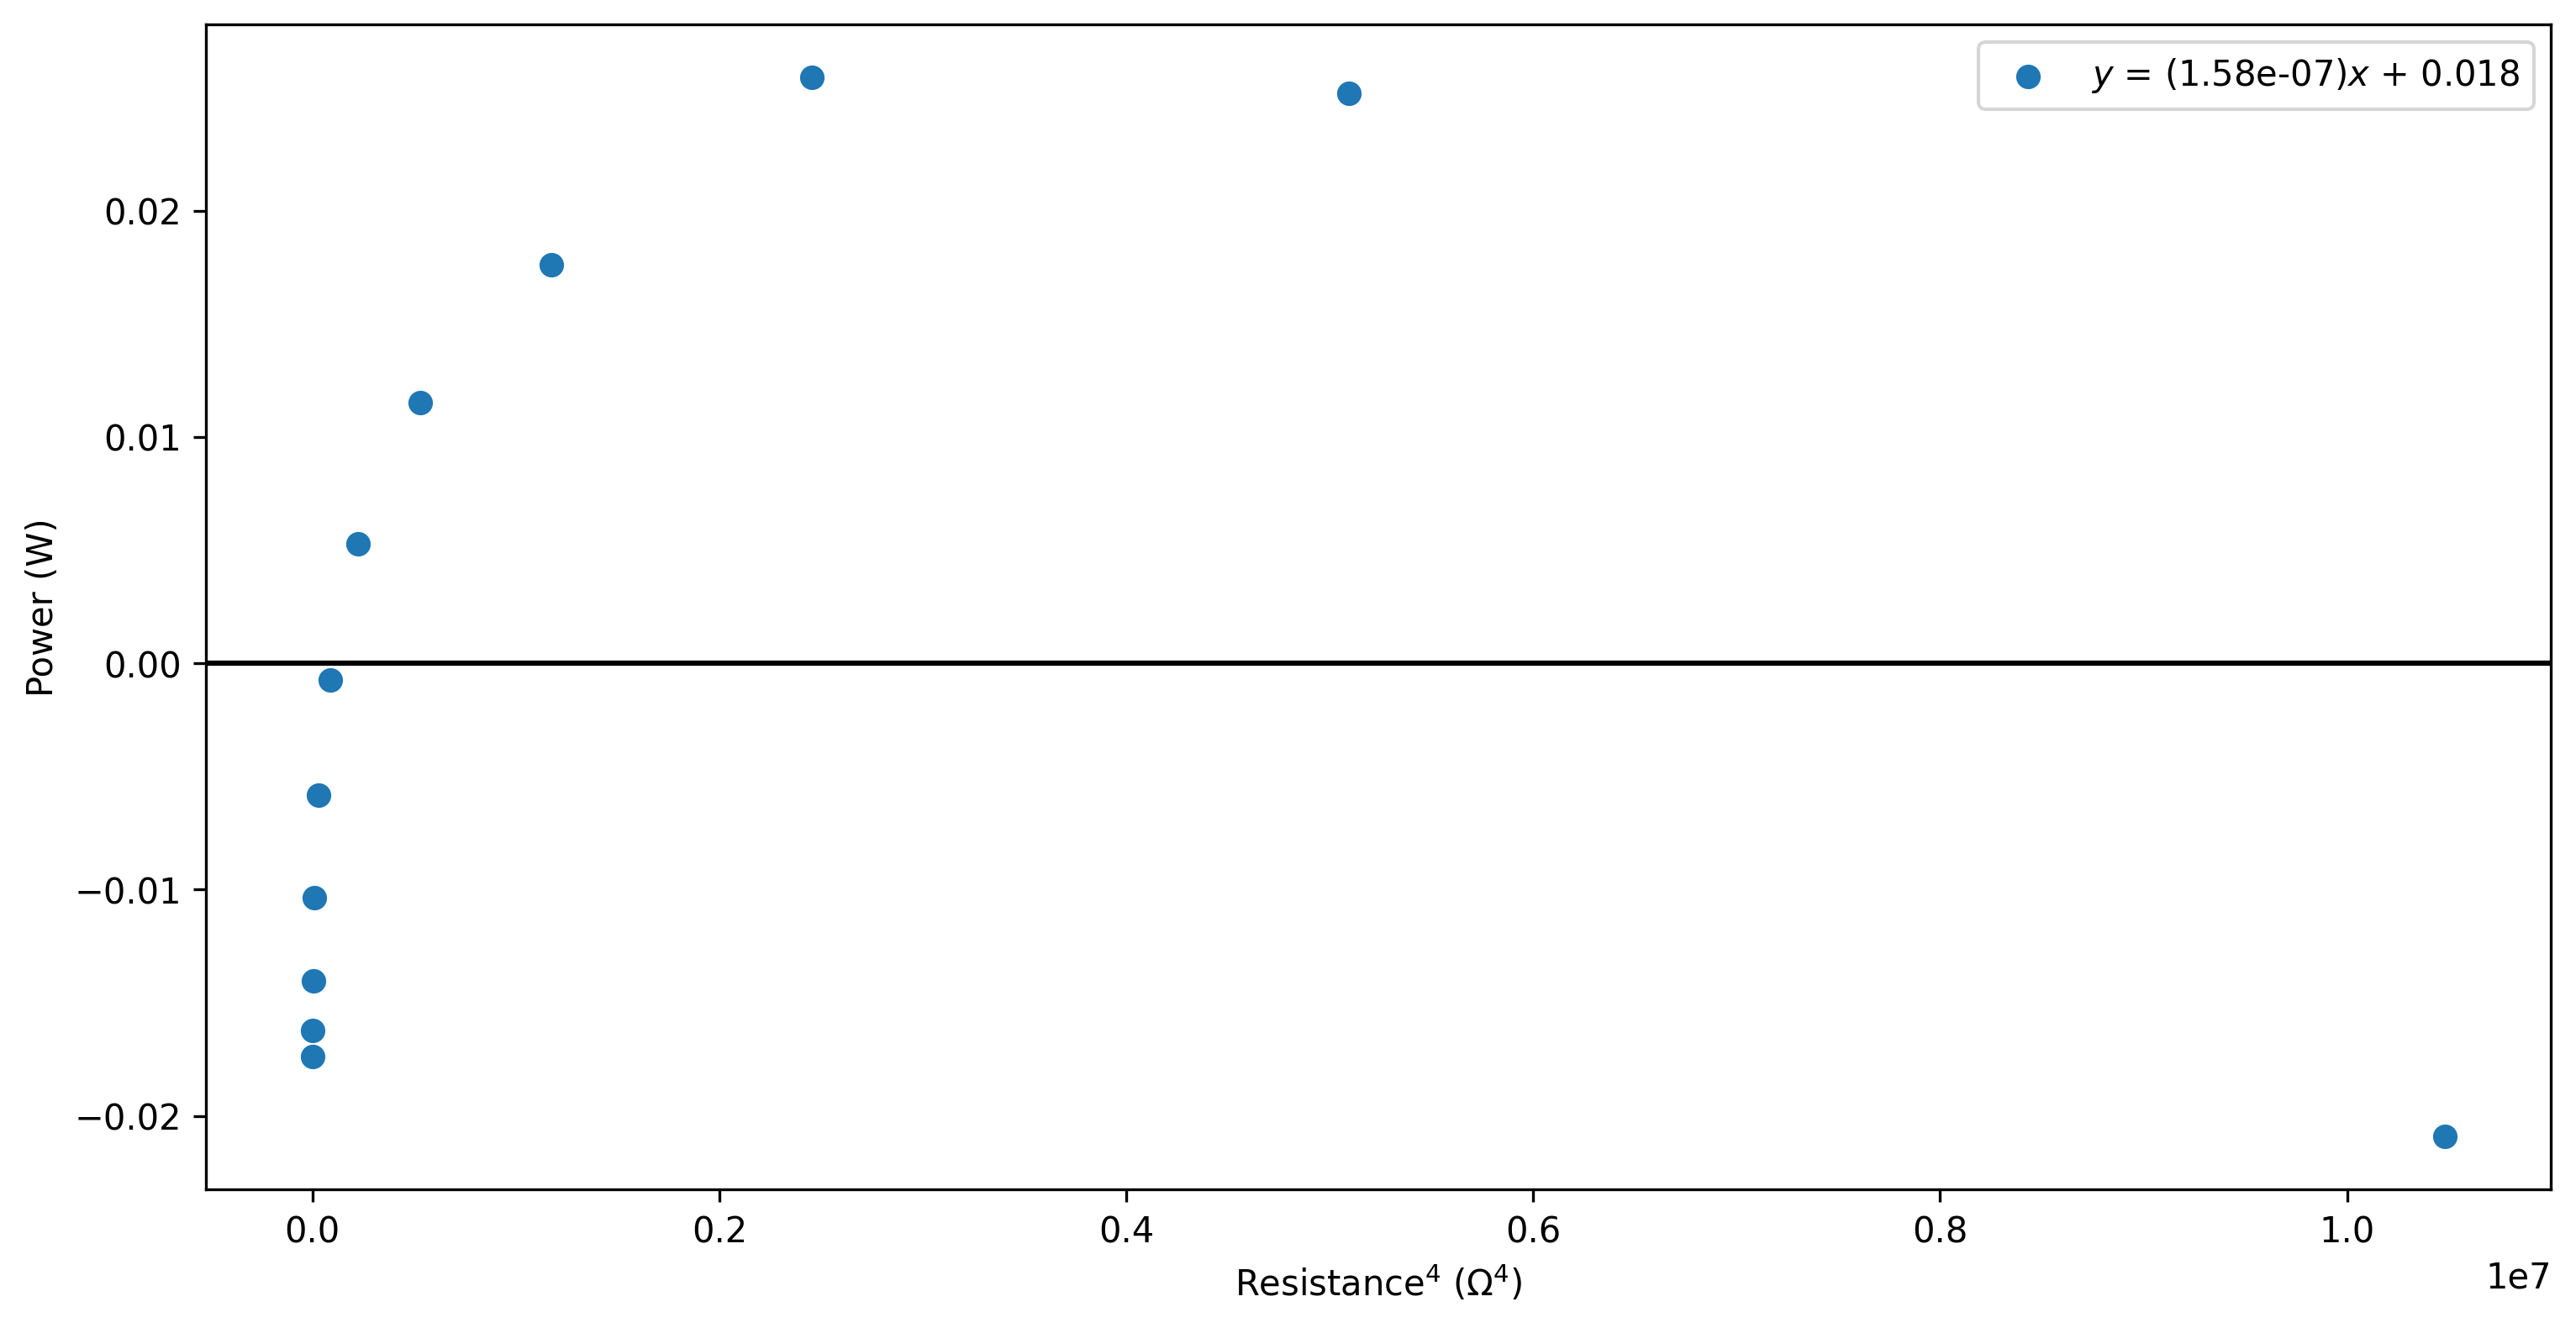

In [60]:
x = resistance ** 4
y = power

p, V = np.polyfit(x,y,1, cov=True)
m,b = p

slope_error = np.sqrt(V[0][0])
intercept_error = np.sqrt(V[1][1])

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

plt.scatter(x, y - m*x - b, label=f'$y$ = ({m:.2e})$x$ + {b:.3f}')
plt.axhline(0, color='black')

plt.xlabel('Resistance$^4$ ($\Omega^4$)')
plt.ylabel('Power (W)')
plt.legend()

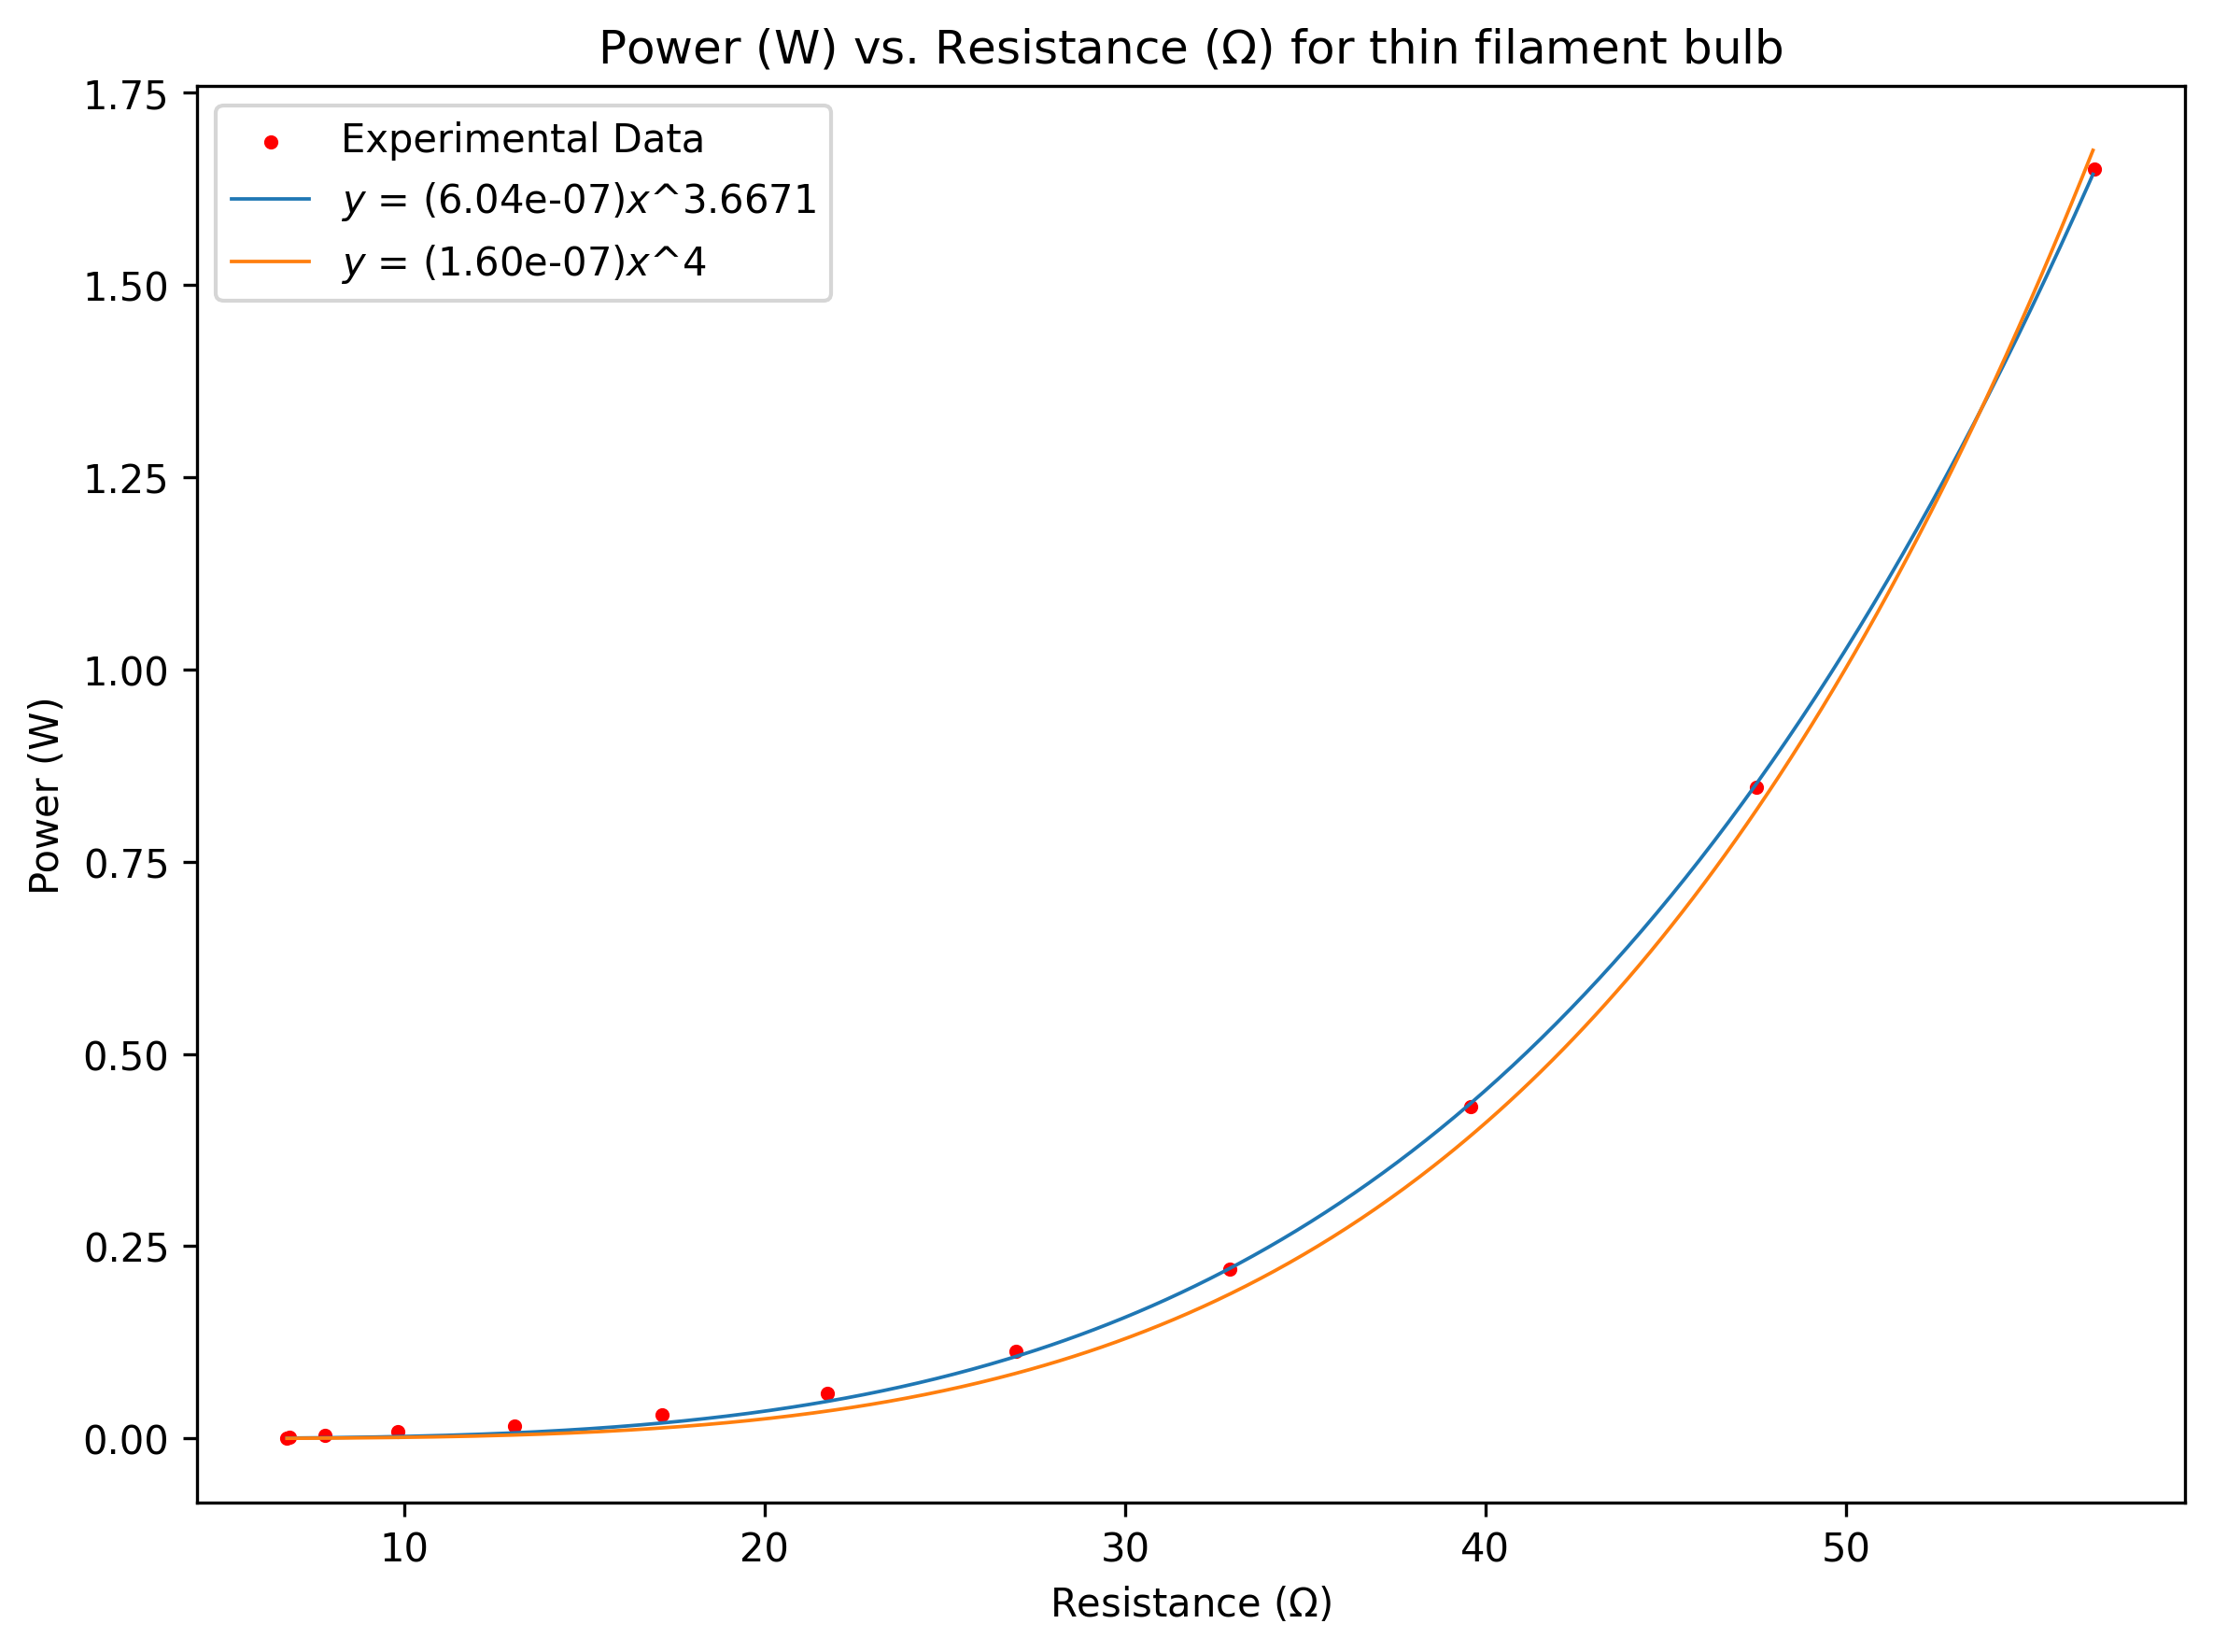

In [36]:
from scipy.optimize import curve_fit

x = resistance
y = power

def f(x, a, b):
    return b * (x ** a)
popt, pcov = curve_fit(f, x, y, bounds=(0, [3.7, 5]))

def fMODEL(x, b):
    return b * (x ** 4)
poptr, pcovr = curve_fit(fMODEL, x, y, bounds=(0, [5]))



fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

plt.scatter(x, y, marker='o', color='red', s=7, label='Experimental Data')

x = np.arange(x.min(),x.max(), 0.1)
plt.plot(x, f(x, *popt), label=f'$y$ = ({popt[1]:.2e})$x$^{popt[0]:.4f}', linestyle='-', linewidth=0.9)
plt.plot(x, fMODEL(x, *poptr), label=f'$y$ = ({poptr[0]:.2e})$x$^4', linestyle='-', linewidth=0.9)


plt.xlabel('Resistance ($\Omega$)')
plt.ylabel('Power (W)')
plt.title('Power (W) vs. Resistance ($\Omega$) for thin filament bulb') 
plt.legend()
plt.tight_layout()

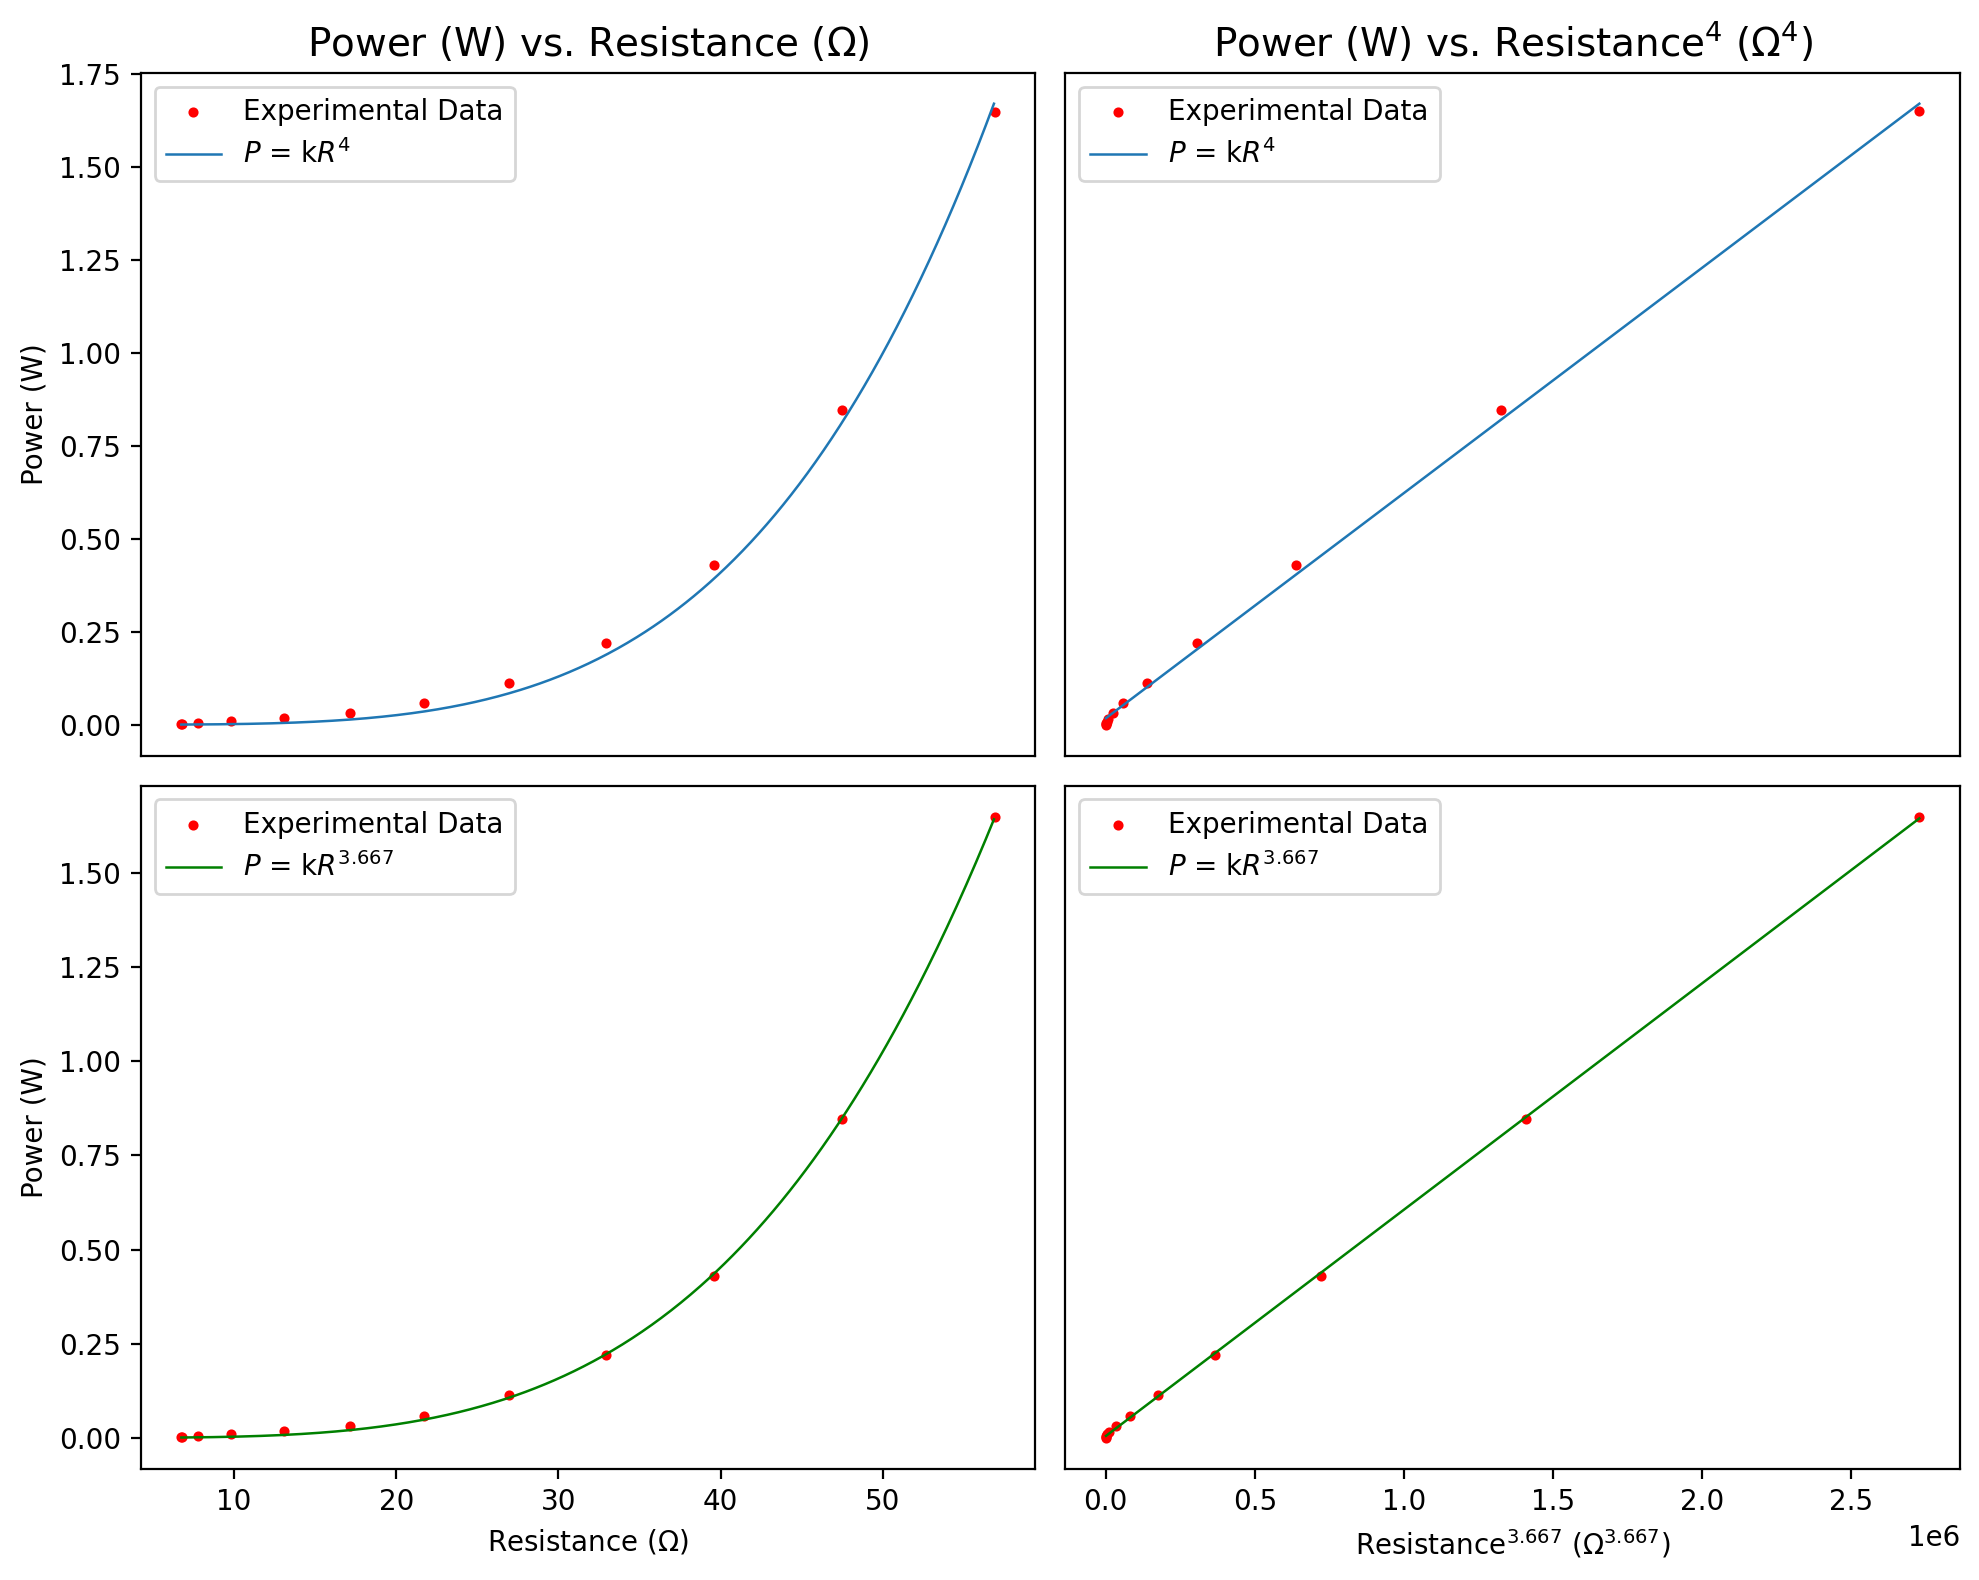

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), dpi=200, layout='tight')

x = resistance
y = power
x2 = np.arange(x.min(),x.max(), 0.1)

ax[0][0].scatter(x, y, marker='o', color='red', s=7, label='Experimental Data')
ax[0][0].plot(x2, 1.6e-7*x2**4, label='$P$ = k$R^4$', linestyle='-', linewidth=0.9)
ax[0][0].set_ylabel('Power (W)')
ax[0][0].set_title('Power (W) vs. Resistance ($\Omega$)')
ax[0][0].legend()
ax[0][0].tick_params(axis='both', which='major', labelsize=10)
ax[0][0].tick_params(axis='both', which='minor', labelsize=8)
# remove x ticks
ax[0][0].set_xticks([])
ax[0][0].title.set_size(14)
ax[0][0].xaxis.label.set_size(10)
ax[0][0].yaxis.label.set_size(10)

x = resistance
y = power
x2 = np.arange(x.min(),x.max(), 0.1)
ax[1][0].scatter(x, y, marker='o', color='red', s=7, label='Experimental Data')
ax[1][0].plot(x2, f(x2, *popt), label='$P$ = k$R^{3.667}$', linestyle='-', linewidth=0.9, color='green')
ax[0][1].set_xticks([])
ax[1][0].set_xlabel('Resistance ($\Omega$)')
ax[1][0].set_ylabel('Power (W)')
ax[1][0].legend()

x = resistance ** 4
x2 = np.arange(x.min(),x.max() + (x.max()-x.min())/4, (x.max()-x.min())/4)
y = power
m, b = np.polyfit(x, y, 1)

ax[0][1].scatter(x, y, marker='o', color='red', s=7, label='Experimental Data')
ax[0][1].plot(x2, m*x2 + b, label='$P$ = k$R^4$', linestyle='-', linewidth=0.9)
ax[0][1].set_yticks([])
ax[0][1].set_title('Power (W) vs. Resistance$^4$ ($\Omega^4$)')
ax[0][1].title.set_size(14)
ax[0][1].legend()

x = resistance ** 3.667
x2 = np.arange(x.min(),x.max() + (x.max()-x.min())/4, (x.max()-x.min())/4)
y = power
m, b = np.polyfit(x, y, 1)

ax[1][1].scatter(x, y, marker='o', color='red', s=7, label='Experimental Data')
ax[1][1].plot(x2, m*x2 + b, label='$P$ = k$R^{3.667}$', linestyle='-', linewidth=0.9, color='green')
ax[1][1].set_yticks([])
ax[1][1].set_xlabel('Resistance$^{3.667}$ ($\Omega^{3.667}$)')
ax[1][1].legend()

# set sup title for the rows